In [16]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

R = np.matmul(X,X.T)/3 # Calculate the covariance matrix
#R = np.cov(X) # Calculate the covariance matrix

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

print ("u1= ",u1)
print ("u2= ",u2)

X_proj = np.dot(U.T,X)
X_proj[1,:]= [0,0,0]
print (X_proj)

X_reconstructed = np.dot (U,X_proj)
print (X_reconstructed)

u1=  [-0.40455358 -0.9145143 ]
u2=  [-0.9145143   0.40455358]
[[-4.46716435 -3.14809647  0.        ]
 [ 0.          0.          0.        ]]
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


In [19]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


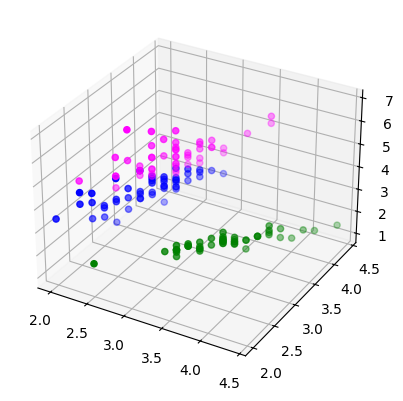

In [23]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show()

[2.93808505 0.9201649  0.14774182]
[0.72962445 0.22850762 0.03668922]


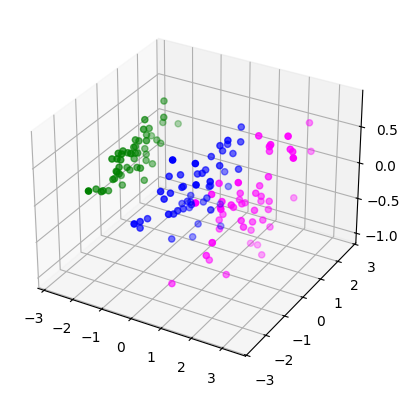

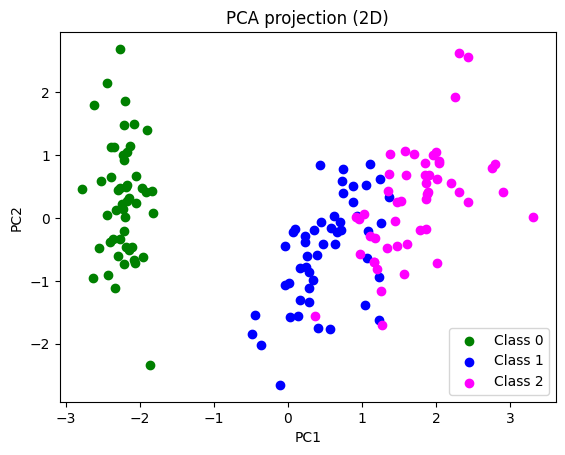

In [32]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()

plt.figure()

plt.scatter(Xpca[y==0,0], Xpca[y==0,1], color='green', label='Class 0')
plt.scatter(Xpca[y==1,0], Xpca[y==1,1], color='blue', label='Class 1')
plt.scatter(Xpca[y==2,0], Xpca[y==2,1], color='magenta', label='Class 2')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title("PCA projection (2D)")
plt.show()

Confusion matrix (Full 4D data):
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


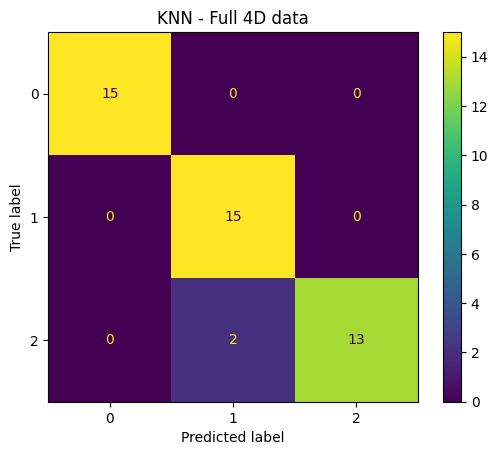

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Prediction
y_pred1 = knn1.predict(X_test)

# Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion matrix (Full 4D data):")
print(cm1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title("KNN - Full 4D data")
plt.show()

Confusion matrix (PCA - 2 components):
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


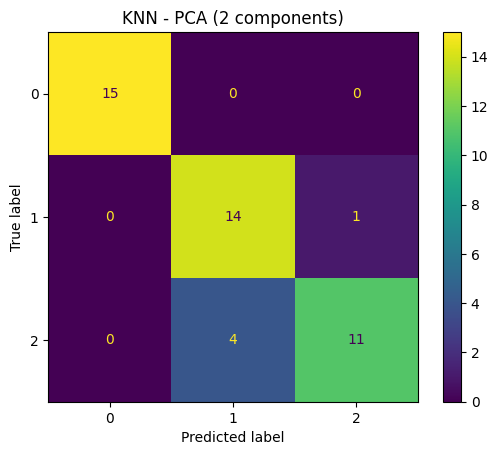

In [38]:
# Use only first 2 principal components
Xpca2 = Xpca[:, :2]

# Split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    Xpca2, y, test_size=0.3, random_state=42, stratify=y
)

# KNN
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_pca, y_train)

# Prediction
y_pred2 = knn2.predict(X_test_pca)

# Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion matrix (PCA - 2 components):")
print(cm2)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.title("KNN - PCA (2 components)")
plt.show()

Confusion matrix (Original first 2 features):
[[15  0  0]
 [ 0 10  5]
 [ 0 10  5]]


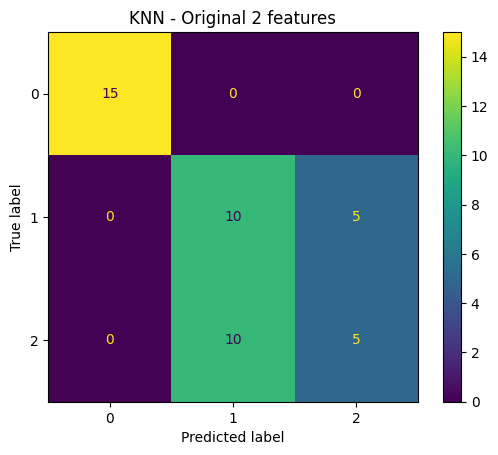

In [40]:
# Use only first two original features
X2 = X[:, :2]

# Split
X_train_2d, X_test_2d, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=42, stratify=y
)

# KNN
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_2d, y_train)

# Prediction
y_pred3 = knn3.predict(X_test_2d)

# Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion matrix (Original first 2 features):")
print(cm3)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
plt.title("KNN - Original 2 features")
plt.show()